#  Practical Implementation: Credit Risk Prediction

## Outline

- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Import Modules and explore the Dataset](#Import-Modules-and-explore-the-Dataset)
  - [Create a new categorical feature](#Create-a-new-categorical-feature)
  - [Handling missing values](#Handling-missing-values)
  - [Visualization](#Visualization)
- [Preprocessing the data](#Preprocessing-the-Data)
  - [Binarizing the targets](#Binarizing-the-Target)
  - [Preprocessing categorical variables](#Preprocessing-categorical-variables)
  - [Preprocessing numerical variables](#Preprocessing-categorical-variables)
  - [Split the dataset into X_train, y_train, X_test, y_test](#Split-the-dataset-into-X_train,-y_train,-X_test,-y_test)
- [Supervised Models](#Supervised-Models)
  - [Evaluation Metrics](#Evaluation-Metrics)
  - [Fine Tuning Models](#Fine-Tuning-Models)

Cheat Sheets:

* [Jupyter Notebook Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/48093c40-5303-45f4-bbf9-0c96c0133c40)
* [Numpy](https://datacamp-community-prod.s3.amazonaws.com/e9f83f72-a81b-42c7-af44-4e35b48b20b7)
* [Pandas](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3)
* [Matplotlib](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b)
* [Scikit-learn](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116)
* [Seaborn](https://datacamp-community-prod.s3.amazonaws.com/f9f06e72-519a-4722-9912-b5de742dbac4)

# 1. Exploratory Data Analysis

## 1.1. Import Modules and explore the Dataset

Q1. First, let's start by importing the basic libraries:

* pandas to manipulate dataframes
* numpy to manipulate arrays
* matplotlib for the plots
* seaborn for fancy plots


Q2. Using pandas, import the csv file "german_credit_data.csv" and show the first 10 rows using dataframe.head(10) and the last 10 rows using dataframe.tail(10)

Q3. Show the basic informations of the dataset using dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


There are two types of variables:

* **Categorical Variables** : for variables that take take a finite number of possibilities. (example: Sex : {male, female}). 

* **Numerical Variables**: for variables that take continuous values (example: Saving accounts $\in \mathbb{R}$)

We will see later how we process these two types of variables by one hot encoding the categorical variables and scaling the numerical variables. 

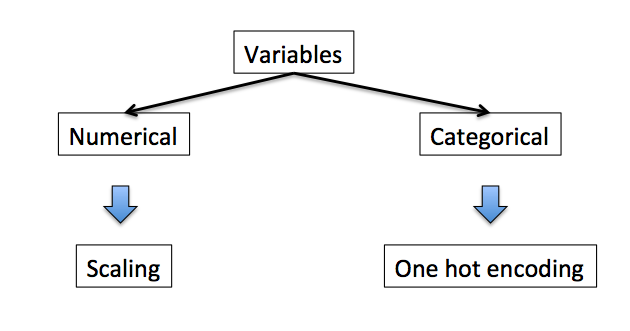

In [2]:
from IPython.display import Image # for showing graphs from the lectures
Image(filename='./images/variables.png',  width=700) 

Q4. The column 'Risk' represent the target. Is the problem a binary classification problem or a multiclass classification one ? 
What about the other columns ? What kind of variables do we have ?
Using dataframe.column.unique() show the different categories of each categorical variable and the target

Sex :  ['male' 'female']
Job :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Checking account :  ['little' 'moderate' nan 'rich']
Risk :  ['good' 'bad']


In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of features. 

The target is: **Risk** (Good or Bad). It is a **binary classification problem**. 


The features can be summarized as follows:
    

*   **Age** (numerical)
*   **Sex** (categorical: male, female)
*   **Job** (categorical: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
*   **Housing** (categorical: own, rent, or free)
*   **Saving accounts** (categorical: little, moderate, quite rich, rich)
*   **Checking account** (categorical: little, moderate, rich)
*   **Credit amount** (numerical: in DM - Deutsch Mark)
*   **Duration** (numerical: in month)
*   **Purpose** (categorical: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)



Q5. Create the two following lists:
* catvars : list of categorical variable names -> [Sex, ... ]
* numsvars : list of numerical variable names -> [Age, ... ]

Q6. Using dataframe[numvars].describe(), show the statistical characteristics of the numerical variables

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


## 1.2 Create a new categorical feature

Q7. Create a new categorical feature named "Age_cat" by trasnforming the numerical feature "Age" into these 4 categories:

* Baby : if age in [min - 25]
* Young : if age in [25 - 35]
* Adult : if age in [35 - 60]
* Senior : if age in [60 - max]

Q8. Add the new feature name "Age_cat" to the list "catvars" 

## 1.3 Handling missing values

Q9. Using dataframe.isnull().any() show which features have missing values. 

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
Age_cat             False
dtype: bool

We have two columns with missing values: "Saving accounts" and "Checking account"

Q10. Using dataframe.isnull().sum() show how many missing values we have for each category ? 

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
Age_cat               0
dtype: int64

We have 183 missing values for "Saving accounts" and 394 missing values for "Checking account"

Q11. Show the rows where we have missing values for the "Checking account" category.

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Adult
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,Senior
16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good,Adult
...,...,...,...,...,...,...,...,...,...,...,...
990,37,male,1,own,NaN,NaN,3565,12,education,good,Adult
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good,Young
994,50,male,2,own,NaN,NaN,2390,12,car,good,Adult
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,Young


There are two ways of handling the missing values of a categorical variable. 

* First method: We ignore the NaN value (we will see that later)
* Second method: We create a new category for the NaN values. 

Let's use the second method for the "Checking account" category. 

Q12. Replace all the NaNs values of the "Checking account" category by a new category called "unknown"

Q13. As a sanity check, show the rows where we have missing values for the "Checking account" category 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat


As expected, there are no more NaNs for the "Checking account" category. 

Q14. Show show the rows where we have missing values for the "Saving accounts" category.

## 1.4 Visualization 

### 1.4.1 Count plot for a categorical variabel. 

A **count plot** can be thought of as a histogram across a categorical variable. It shows the counts of observations in each category using bars.

Q15. Using seaborn.countplot, display the **count plot** of the categorical variable "Saving Accounts (where you separate the counts for the good and bad targets)

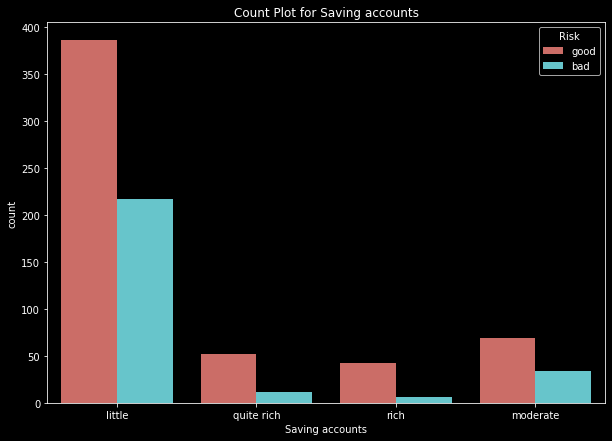

Q16. What category is the dominant one in the dataset ? 

Q17. Is there a category of samples for which we have more "bad" targets than "good" ones ? 

### 1.4.2 Numerical variable distribution

We want to plot a univariate distribution of a numerical variable associated to the "good" and the "bad" targets. 

Q18. Using seaborn.displot, display the distribution of the "Duration" numerical variable for the good and the bad targets. 

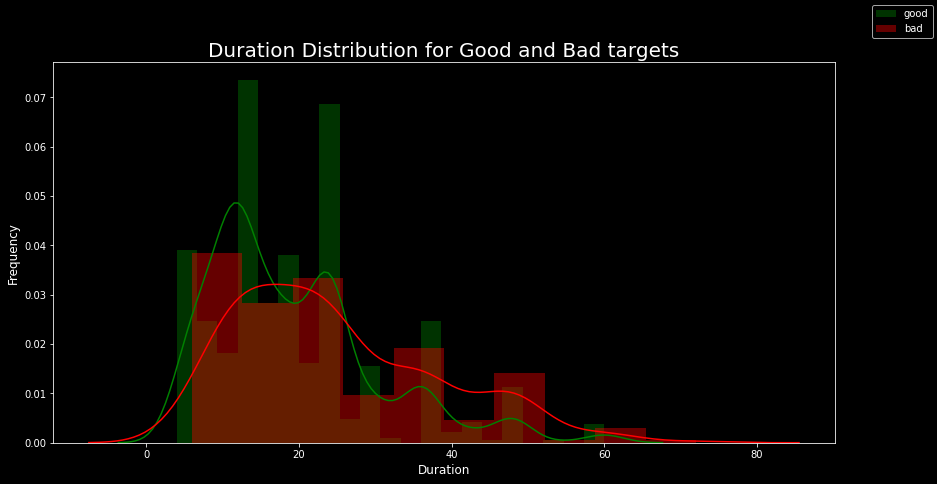

Q19. What can you say about these distributions ? 

### 1.4.3 Boxplots 

Now, we want to show the distribution of a numerical variable for all the values of a categorical variable

To that end, we use box plots:

Boxplots display the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

* **median (Q2/50th Percentile)**: the middle value of the dataset.
* **first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* **third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.
* **interquartile range (IQR)**: 25th to the 75th percentile.
* **whiskers** (shown in blue)
* **outliers** (shown as green circles)
* **maximum**: Q3 + 1.5*IQR
* **minimum**: Q1 -1.5*IQR 

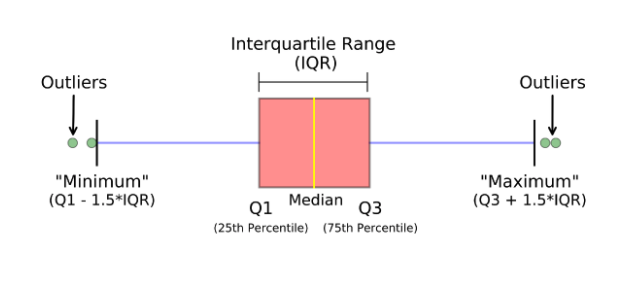

In [3]:
Image(filename='./images/boxplot.png',  width=700) 


Q20. Using seaborn.boxplot, display the distribution of the numerical variable "Credit amount" across all the levels of the categorical variable "Purpose". Again, seperate the good and the bad targets

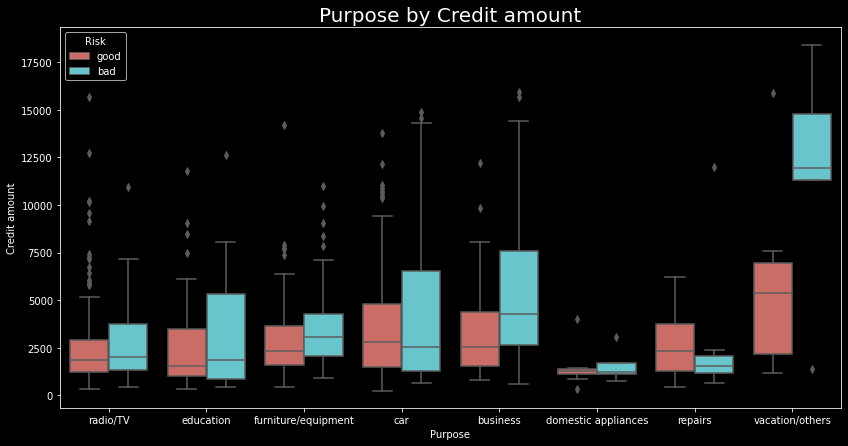

Q21. For which category do we have clearly separated distributions of the numerical "Credit Amount" variable according to the good and bad targets ? 

# 2. Preprocessing the data

Q22. Using dataframe.copy(), keep a copy of the dataframe before performing the preprocessing transformations. 

## 2.1 Binarizing the targets

Q23. Replace the values of the target:
* "good" $\rightarrow$ 1
* "bad" $\rightarrow$ 0

## 2.2 Preprocessing categorical variables 

* Let's suppose we have a categorical variable X that can take K different values $\{1, \dots, K\}$

* **One hot encoding** a category consists in transforming the category into a vector $\in \mathbb{R}^K$ where we have 1 in the position of the category and zeros elswhere. 

* For instance, if $K=4$, the category "3" for one sample is one hot encoded into the vector $[0, 0, 1, 0]$


* Therefore, we can turn a catogorical feature into K features. 

* As each sample is only mapped to one category, the K features are not independent (the K-th feature can be deduced from the K-1 first features). Therefore, we usually frop the K-th feature column because

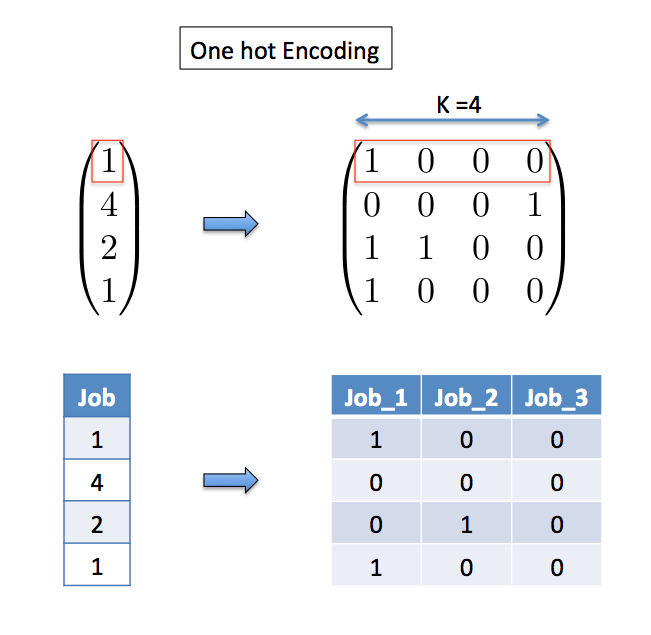

In [4]:
Image(filename='./images/OneHotEncoding.png',  width=500) 

Q24. For each categorical variable, pring the names of the different categories and their number.

The categories:

Feature: Sex ... Categories: ['male' 'female']
Feature: Job ... Categories: [2 1 3 0]
Feature: Housing ... Categories: ['own' 'free' 'rent']
Feature: Saving accounts ... Categories: [nan 'little' 'quite rich' 'rich' 'moderate']
Feature: Checking account ... Categories: ['little' 'moderate' 'unknown' 'rich']
Feature: Purpose ... Categories: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Feature: Age_cat ... Categories: [Senior, Baby, Adult, Young]
Categories (4, object): [Baby < Young < Adult < Senior]


The number of categories:

Sex                 2
Job                 4
Housing             3
Saving accounts     4
Checking account    4
Purpose             8
Age_cat             4
dtype: int64

Q25. Print the shape of data before One Hot Encoding

(1000, 11)

Q26. Using pandas.get_dummies or sklearn.preprocessing.OneHotEncoder, transform each categorical variable (with K categories) into K-1 new feature columns.

Q27. Determine the dimensionality of the dataset (i.e, the number of features) after the one hot encoding ? 

If each categorical variable $c$ has $K_c$ different categories. Let's $D_{\text{num}}$ be the number of numerical variables and $D_{\text{cat}}$ the number of categorical variables after the one hot encoding.The number of features $D$ is the following:

\begin{align}
D &= \sum_c^{D_{\text{cat}}} (K_C -1)+ D_{\text{num}} \\
&= (K_{\text{Sex}} - 1) + (K_{\text{Job}} - 1) + (K_{\text{Housing}} - 1) + (K_{\text{Saving accounts}} - 1) + (K_{\text{Checking account}} - 1) + (K_{\text{Purpose}} - 1) + (K_{\text{Age_cat}} - 1) + N_{\text{num}} \\
&= (2 - 1) + (4 -1) + (3 - 1) + (4 - 1) + (4 - 1) + (8 - 1) + (4 - 1) + 3 \\
&= 25
\end{align}


Q28. Print the new shape of data. Does it correspond to your calculations ?

(1000, 26)

Yes. We have 25 features and 1 column for the target. 

In [0]:
df.columns

Index(['Age', 'Credit amount', 'Duration', 'Risk', 'Sex_male', 'Job_1',
       'Job_2', 'Job_3', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich', 'Checking account_unknown', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Age_cat_Young', 'Age_cat_Adult',
       'Age_cat_Senior'],
      dtype='object')

## 2.3 Preprocessing Numerical Variables

There are two ways of scaling a numerical variable:

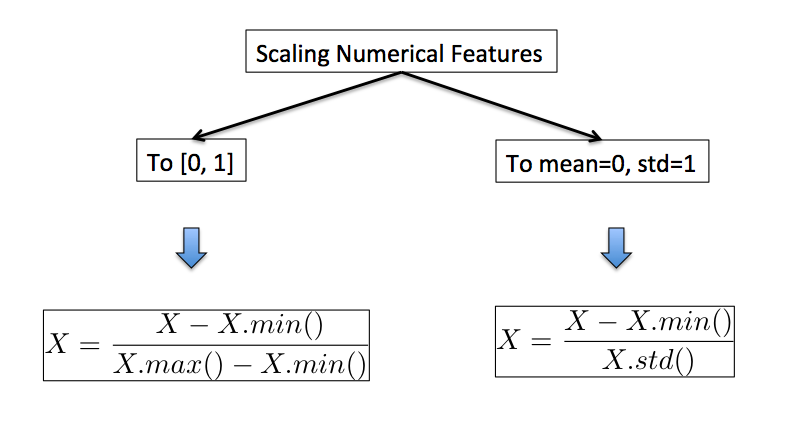

In [5]:
Image(filename='./images/NumFeatures.png',  width=500) 

Q29. Split your dataframe into two subdataframes:

* "df_numvars": containing the three columns of the numerical features
* "df_rest": containing the rest of the features and the target 

Q30. Plot the histograms of the three numerical variables of "df_numbars" using dataframe.hist()

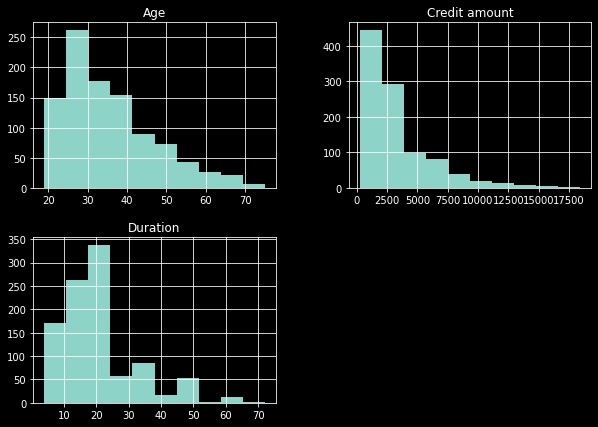

Q31. Using sklearn.preprocessing, scale the numerical features using one of the two scaling methods 

Q32. Plot the histograms of the three numerical features after the scaling process. 

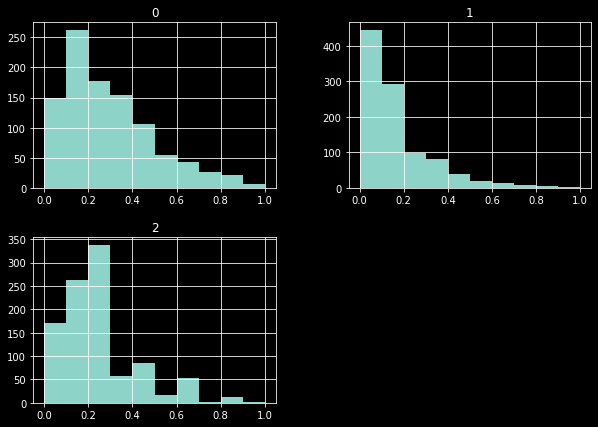

Q33. Concatenate "df_rest" with your scaled dataframe of numerical features. 

Q34. Show the first 10 rows of the new dataset

,0,1,2,Risk,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Checking account_unknown,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,2.766456,-0.745131,-1.236478,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,-1.191404,0.949817,2.248194,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1.183312,-0.416562,-0.738668,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0.831502,1.634247,1.750384,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1.535122,0.566664,0.256953,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,-0.048022,2.050009,1.252574,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
6,1.535122,-0.154629,0.256953,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
7,-0.048022,1.303197,1.252574,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
8,2.238742,-0.075233,-0.738668,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
9,-0.663689,0.695681,0.754763,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


## 2.4 Split the dataset into X_train, y_train, X_test, y_test

Q35. Seperate your final dataframe into: 

* X : The features
* Y : The targets

Q36. Split the data (X, Y) into (X_train, X_test, Y_train, y_test) using train_test_split from sklearn.model_selection (use 30% of the data for the test set).

# 3. Supervised Models

## 3.1 Evaluation Metrics

First, let's start by a review of the different evaluation metrics

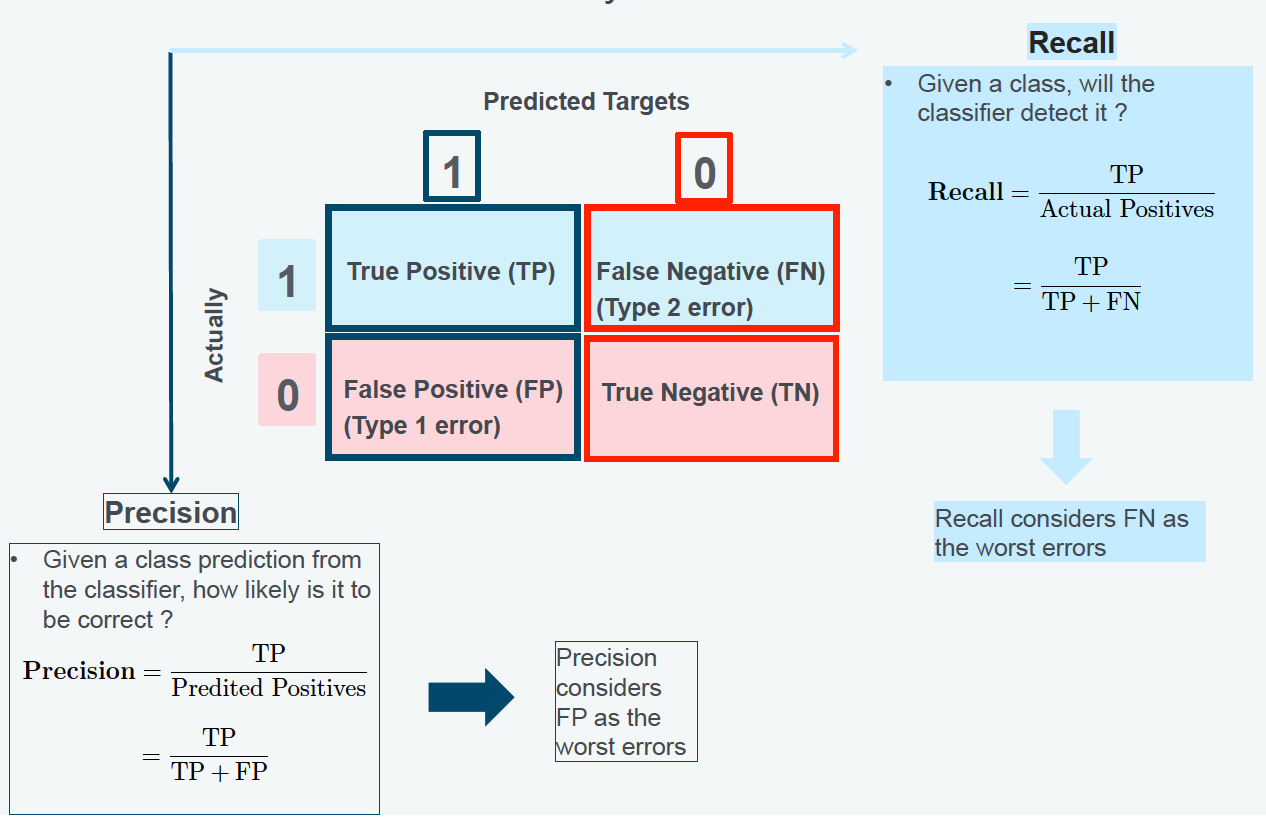

In [6]:
Image(filename='./images/confusion_matrix.png',  width=700) 

The F1 score is calculated as follows: 

$$
\text{F1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

Q37. Which of the two errors is the most dangerous one for the credit problem ? 

A brief reviex of Cross Validation:

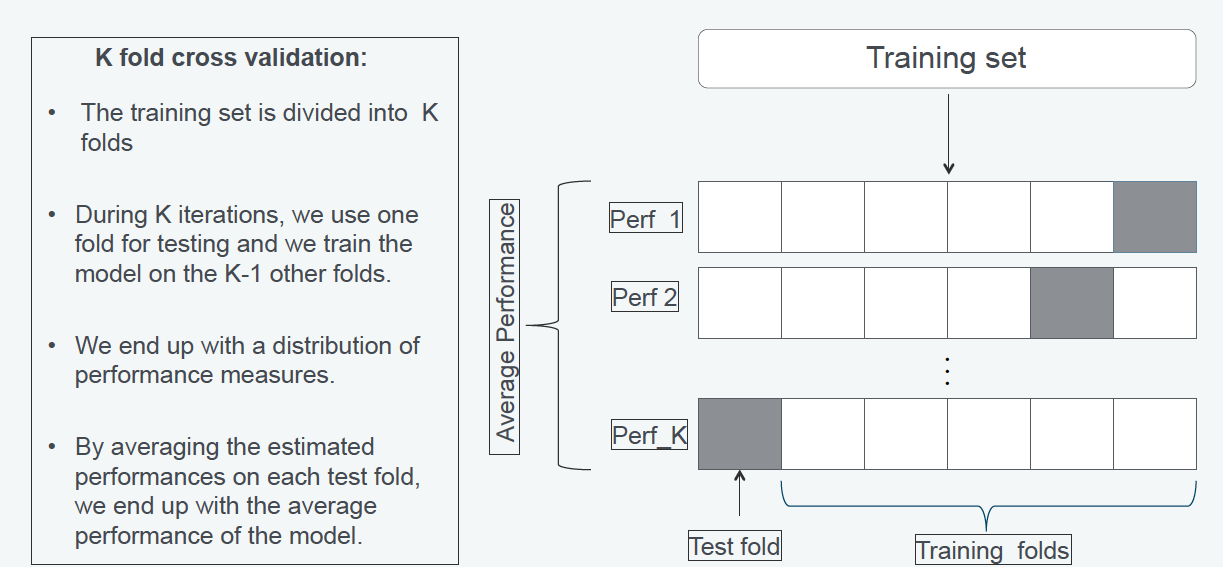

In [7]:
Image(filename='./images/crossval.png',  width=700) 

Q38. Using cross_val_score from sklearn.model_selection, write a function that takes as inputs the classifier, the training features and the training targets. The function should output the distribution (the mean and the std) of the following performance measures using cross validation. 

* Presicion
* Recall
* f1 score
* auc
* accuracy


Q39. Using confusion_matrix from sklearn.metrics, write a function that takes as inputs the classifier **after training**, the test features and the test targets. The function should output a plot of the confusion matrix on the test set. 

## 3.2 Fine Tuning Models 

### 3.2.1 Fine Tuning SVD and Random Forest

Brief review of Grid Search:

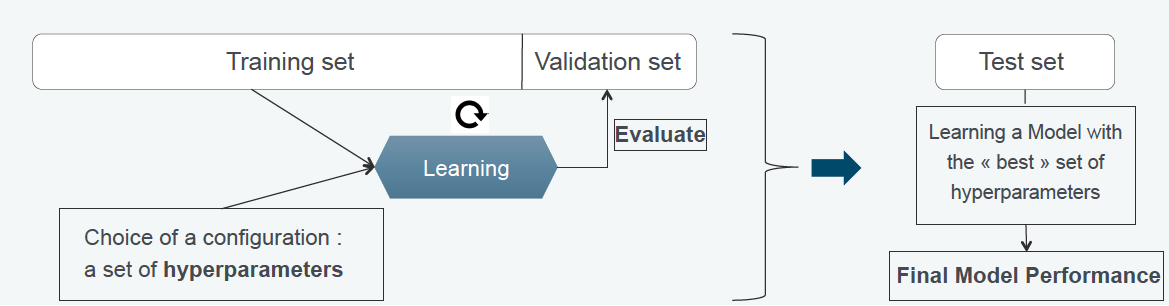

In [8]:
Image(filename='./images/tuning.png',  width=1000) 

Q39. Using the code from Programming_Session_1, create a pipeline composed of:

* SVD (use TruncatedSVD from sklearn.decomposition) as a dimensionality reduction technique. 
* Random Forest 

Fine Tune the hyperparameters using Grid Search and determine the optimal model. 

The optimal precision is 0.7799186168203049
The optimal hyperparameters are {'clf__max_features': 10, 'clf__n_estimators': 20, 'svd__n_components': 20}


Q40. Display the different performance measures and the confusion matrix for the "optimal" pipeline composed of SVD and Random Forest. 




Cross Validation Precision: 0.74 (+/- 0.02)
Cross Validation Recall: 0.83 (+/- 0.05)
Cross Validation f1 score: 0.79 (+/- 0.04)
Cross Validation roc_auc: 0.71 (+/- 0.05)
Cross Validation Accuracy: 0.69 (+/- 0.04)


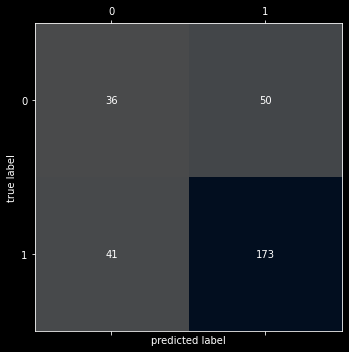

### 3.2.2 Fine Tuning PCA and Logistic Regression

Q41. Using the code from Programming_Session_1, create a pipeline composed of:

* PCA as a dimensionality reduction technique. 
* Logistic Regression 

Fine Tune the hyperparameters using Grid Search and determine the optimal model. 

The optimal precision is 0.7566572981936984
The optimal hyperparameters are {'clf__penalty': 'l2', 'pca__n_components': 20}


Q42. Display the different performance measures and the confusion matrix for the "optimal" pipeline composed of PCA and Logistic Regression. 


Cross Validation Precision: 0.75 (+/- 0.01)
Cross Validation Recall: 0.88 (+/- 0.02)
Cross Validation f1 score: 0.81 (+/- 0.01)
Cross Validation roc_auc: 0.74 (+/- 0.04)
Cross Validation Accuracy: 0.72 (+/- 0.02)


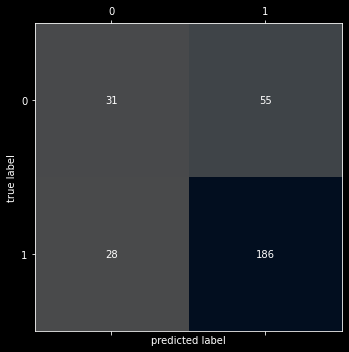

### 3.2.3 Naive Bayes Classifier

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence of features conditioned on the target. 

Given a class variable y and a dependent feature vector x<sub>1</sub> through x<sub>n</sub>, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                                 
Using the naive independence assumption this relationship is simplified to:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                               

Since P(x<sub>1</sub>, ..., x<sub>n</sub>) is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

$$\Downarrow$$

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use Maximum A Posteriori (MAP) estimation to estimate P(y) and P(x<sub>i</sub> | y); the former is then the relative frequency of class y in the training set.

There are different naive Bayes classifiers that differ mainly by the assumptions they make regarding the distribution of P(x<sub>i</sub> | y).

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution. 

For example of using the Gaussian Distribution, suppose the training data contain a continuous attribute, x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let  μ<sub>c</sub> be the mean of the values in x associated with class c, and let  σ<sup>2</sup><sub>c</sub> be the variance of the values in x associated with class c. Then, the probability distribution of some value given a class, p(x=v|c), can be computed by plugging v into the equation for a Normal distribution parameterized by μ<sub>c</sub> and  σ<sup>2</sup><sub>c</sub>. That is:

$$p(x=v|c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }$$

Q43. Instead of the previous pipelines, use a simple Gaussian Naive Bayes model from sklearn and display the difference performance measures. 

Cross Validation Precision: 0.79 (+/- 0.02)
Cross Validation Recall: 0.72 (+/- 0.06)
Cross Validation f1 score: 0.75 (+/- 0.04)
Cross Validation roc_auc: 0.69 (+/- 0.06)
Cross Validation Accuracy: 0.67 (+/- 0.04)


Q44. Display the Confusion Matrix on the test set

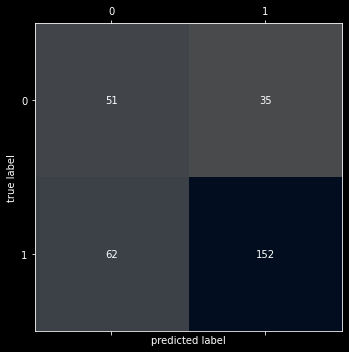

Q45. Using roc_auc from sklearn.metrics, plot the ROC curve for Gaussian Naive Bayes Model. 

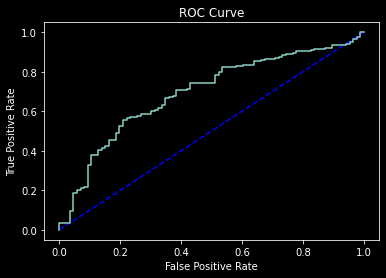